# Investment Analysis Assignment

In [1]:
#import the libraries
import pandas as pd
import numpy as np

#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Checkpoints - Part 1

## Checkpoint 1: Data Cleaning 1

##### Encoding in python

In [2]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [3]:
with open('companies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

# To check what the character encoding might be
print(result)

with open("rounds2.csv", 'rb') as rawdata:
    result1 = chardet.detect(rawdata.read())

# check what the character encoding might be
print(result1)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}
{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


As chardet is 46% confidence, language is 'Turkish' & encoding is 'Windows-1254', So 'palmos' rectifies these characters and rightly changed to their correct uppercase strings and then matched properly against their equivalents, by giving right count.

In [4]:
# read in the file with the encoding 'palmos'
companies = pd.read_csv("companies.csv", encoding='palmos')
rounds2 = pd.read_csv("rounds2.csv", encoding='palmos')

# read the mapping file for sector analysis
mapping_file=pd.read_csv('mapping.csv')

In [5]:
#verifying the data in companies
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


**Observation**: There are few more rows with special characters, instead of deleting the non-encoded rows, we will continue with the analysis, as the other columns data has values, which acn be used for the three analysis.

In [6]:
#verifying the data in rounds2
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [7]:
# converting columns to lowercase to eliminate duplicate count, also for uniformity in companies and rounds2 dataframes
companies['permalink']=companies['permalink'].str.lower()
companies['category_list']=companies['category_list'].str.lower()
companies['name']=companies['name'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.lower())

Table 1.1: __"How many unique companies are present in `companies`?"__

In [8]:
# Look at unique values
len(companies['permalink'].unique())

66368

In [9]:
# displaying frequencies of each category, just to verify(didnt load all categories, as rows=66368)
companies['permalink'].value_counts()

/organization/nabbesh-com                1
/organization/fourandhalf                1
/organization/shezoom                    1
/organization/rev-apm                    1
/organization/keepvision                 1
                                        ..
/organization/tutorando                  1
/organization/avogy                      1
/organization/taste-kitchen              1
/organization/innolight                  1
/organization/zynerba-pharmaceuticals    1
Name: permalink, Length: 66368, dtype: int64

**Observation**: Number of unique companies Present in __"`companies`"__  = 66368

Table 1.1: __"How many unique companies are present in `rounds2`?"__

In [10]:
len(rounds2['company_permalink'].unique())

66368

In [11]:
# displaying frequencies of each category, just to verify(didnt load all categories, as rows=66368)
rounds2['company_permalink'].value_counts()

/organization/solarflare                 19
/organization/exagen-diagnostics         18
/organization/quellan                    18
/organization/semprius                   18
/organization/vocalocity                 17
                                         ..
/organization/mylumper                    1
/organization/pantero                     1
/organization/minibar-delivery            1
/organization/lumenis                     1
/organization/zynerba-pharmaceuticals     1
Name: company_permalink, Length: 66368, dtype: int64

**Observation**: Number of unique companies resent in __"`rounds2`"__  = 66368

Table 1.1:__"Are there any companies in the `rounds2` file which are not present in `companies`?"__

In [12]:
# to check the companies in 'companies' df are present in 'rounds2' df
companies['permalink'].isin(rounds2['company_permalink']).value_counts()

True    66368
Name: permalink, dtype: int64

No, as all are true, so all companies present in 'companies' are in 'rounds2'

In [13]:
#To check the companies in 'rounds2' df are present in 'companies' df
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

True    114949
Name: company_permalink, dtype: int64

No, as all are true, so all companies present in 'rounds2' are there in 'companies'

In [14]:
#To check the companies in 'rounds2' df are not present in 'companies' df
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


**Observation**: There is no other companies in `rounds2` which are not present in `companies`

In [15]:
#Merging the two data frames so that all variables (columns) in the `companies` frame are added to the `rounds2` data frame
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink')
print(master_frame.shape)
master_frame.head()

(114949, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007


Table 1.1:__"How many observations are present in `master_frame`?"__

In [16]:
master_frame.shape

(114949, 16)

For master_frame, there are 114949 observations in total.

### Data Cleaning

#### Treating Null Values / Missing Values / redundant columns/rows

In [17]:
# checking missing/null values in master_frame df(column wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [18]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

**Observations**:
1. `funding_round_code`-72.9%,  `homepage_url`-5% , `founded_at` - 18%, columns have missing values, which will not impact for our analysis, so we can delete columns, as deletion of rows with NaNs will impact our analysis. 
2. `permalink` is duplicate of `company_permalink` and `company_permalink` contains company name, we can also get this information from `name` column, so both these columns(`company_permalink`, `permalink`) can be removed.
3. `funding_round_permalink` has 0 missing values, but this information willn't drive the analysis, we can remove this column.
4. `raised_amount_usd`,column has 17% of missing values and these values are used to check the best investment type, either we need to remove the rows or impute the missing values, we will do this further.

In [19]:
# removing redundant columns, which will not impact our analysis
master_frame=master_frame.drop(columns=['company_permalink', 'funding_round_permalink', 'permalink','funding_round_code', 'homepage_url', 'founded_at'])
print(master_frame.shape)
master_frame.head()

(114949, 10)


,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,venture,05-01-2015,10000000.0,#fame,media,operating,IND,16,Mumbai,Mumbai
1,venture,14-10-2014,NaN,:qounter,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
2,seed,01-03-2014,700000.0,:qounter,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,venture,30-01-2014,3406878.0,"(the) one of them,inc.",apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,venture,19-03-2008,2000000.0,0-6.com,curated web,operating,CHN,22,Beijing,Beijing


In [20]:
# re-Verifying the null values 
master_frame.isnull().sum()

funding_round_type        0
funded_at                 0
raised_amount_usd     19990
name                      1
category_list          3410
status                    0
country_code           8678
state_code            10946
region                10167
city                  10164
dtype: int64

In [21]:
# renaming the 'name' column to 'company_name' & moving the column to beginning 
master_frame=master_frame.rename(columns={'name':'company_name'})
company_name = master_frame['company_name']
master_frame.drop(labels=['company_name'], axis=1,inplace = True)
master_frame.insert(0, 'company_name', company_name)
master_frame.head()

,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,state_code,region,city
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,16,Mumbai,Mumbai
1,:qounter,venture,14-10-2014,NaN,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
2,:qounter,seed,01-03-2014,700000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,"(the) one of them,inc.",venture,30-01-2014,3406878.0,apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN,22,Beijing,Beijing


In [22]:
# verifying how many rows are present with 'status' column as "closed"
(master_frame['status']=='closed').value_counts()

False    106224
True       8725
Name: status, dtype: int64

***Observation***: There are 8725 rows with closed status for funds and these will no longer accept money from new investors, so we can remove the rows with closed status

In [23]:
# removing rows, which have 'status' column with "closed"
master_frame=master_frame[~(master_frame['status']=='closed')]
print(master_frame.shape)
master_frame.head()

(106224, 10)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,state_code,region,city
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,16,Mumbai,Mumbai
1,:qounter,venture,14-10-2014,NaN,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
2,:qounter,seed,01-03-2014,700000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,"(the) one of them,inc.",venture,30-01-2014,3406878.0,apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN,22,Beijing,Beijing


In [24]:
# verifying rows,which have "0" in  raised_amount_usd column
(master_frame['raised_amount_usd']==0).value_counts()

False    105817
True        407
Name: raised_amount_usd, dtype: int64

**Obsevation**: The count of rows have "zeros" is more, we can delete them, as these will not drive our analysis,

In [25]:
# removing rows,which have "0" in  raised_amount_usd column
master_frame=master_frame[~(master_frame['raised_amount_usd']==0)]
print(master_frame.shape)
master_frame.head()

(105817, 10)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,state_code,region,city
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,16,Mumbai,Mumbai
1,:qounter,venture,14-10-2014,NaN,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
2,:qounter,seed,01-03-2014,700000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,"(the) one of them,inc.",venture,30-01-2014,3406878.0,apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN,22,Beijing,Beijing


Imputing the missing values, as the 'raised_amount_usd' column has 17% missing values.

In [26]:
#Checking the stats, 
master_frame.describe()

,raised_amount_usd
count,8.749600e+04
mean,1.070443e+07
std,1.193137e+08
min,1.000000e+00
25%,3.500000e+05
50%,1.750000e+06
75%,7.000046e+06
max,2.127194e+10


**Observation**:
As per above results(imputation of `raised_amount_usd` with) :
1. mode is not considerable, as this data is continuous
2. mean is very much effected by the extreme values(min value and max values variation is more)
3. Median is considered, as per the stats shown above

The difference between the mean and the median is more(but lower the better) and the variation from 25th to 75th percentile (quite large)

In [27]:
#Imputing the missing values with median by assigning the median amount of raised_amount_usd
Median=master_frame['raised_amount_usd'].median()
print(Median)

1750000.0


In [28]:
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(Median)

In [29]:
# re-verifing the nullvalues by summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_name          0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd     0.00
category_list         2.23
status                0.00
country_code          6.42
state_code            8.41
region                7.71
city                  7.71
dtype: float64

**Observation**: `raised_amount_usd` has zero null values.

`country_code`, `state_code`, `region`, `city` and `category_list` columns have missing values less than 10%, also dropping these rows will impact, as other columns like'raised_amount_usd', has no null values. so, for funding type analysis, we will not drop these rows.

## Checkpoint 2: Funding Type Analysis

Spark Funds wants to choose one of these four investment types for each potential investment they will make, by calculating the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity).

In [30]:
# grouping these four funding types(seed,angel,venture,private_equity) into new df(master_frame_4FT)
master_frame_4FT=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
master_frame_4FT

,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,state_code,region,city
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,16,Mumbai,Mumbai
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
2,:qounter,seed,01-03-2014,700000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,"(the) one of them,inc.",venture,30-01-2014,3406878.0,apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN,22,Beijing,Beijing
...,...,...,...,...,...,...,...,...,...,...
114942,zzzzapp wireless ltd.,seed,01-11-2011,7000.0,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split
114943,zzzzapp wireless ltd.,seed,01-08-2013,33149.0,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split
114945,zzzzapp wireless ltd.,seed,01-05-2013,32842.0,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split
114946,ãeron,venture,01-08-2014,1750000.0,NaN,operating,NaN,NaN,NaN,NaN


In [31]:
#checking the statistics for master_frame
master_frame_4FT.describe()

,raised_amount_usd
count,8.669100e+04
mean,8.457569e+06
std,7.273542e+07
min,1.000000e+00
25%,5.650000e+05
50%,1.750000e+06
75%,6.100000e+06
max,1.760000e+10


**Observation**: From the stats, it is clear that mean is effected by the min and max values, so median is the most representative value of the investment amount)

Table-2.1: __"Representative Values of Investments for Each of these Funding Types"__

In [32]:
# finding the median of the four funding types by grouping them in descending order
master_frame_4FT_group=master_frame_4FT.groupby('funding_round_type')
master_frame_4FT_group['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    13259343.0
venture            4048162.0
seed                600000.0
angel               600000.0
Name: raised_amount_usd, dtype: float64

**Observation**: As per the results, __"Venture"__ is the potential investment, as it falls between 5-15million USD, as per business requirement.

#### Visualising Numeric Variables

Let's make a boxplot, to check the outliers, Outliers in data can arise due to genuine reasons or because of dubious entries. Need to remove such entries immediately. By plotting a boxplot, we can observe, analyse and remove them.

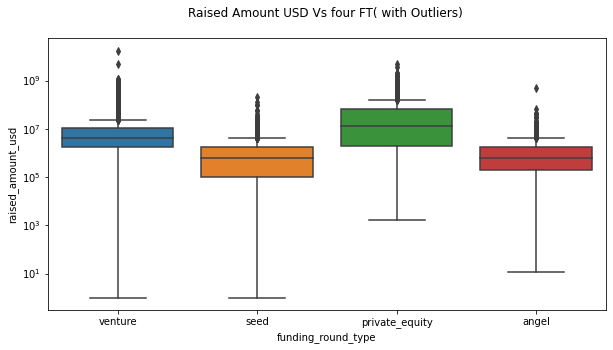

In [33]:
# box plot to check the outliers in funding types
plt.figure(figsize=(10,5))
plt.title("Raised Amount USD Vs four FT( with Outliers) \n", fontsize=12)
sns.boxplot(master_frame_4FT.funding_round_type, master_frame_4FT.raised_amount_usd)
plt.yscale('log')
plt.show()

**Observation**: Clearly,there are outliers, by removing them, we will check the results

In [34]:
# calculating the outliers for private equity
Q1=master_frame_4FT['raised_amount_usd'].quantile(0.25)
Q3=master_frame_4FT['raised_amount_usd'].quantile(0.75)
IQR=Q3-Q1
print("IQR =", IQR)

Outliers_lower=(Q1)-1.5*(IQR)
Outliers_upper=(Q3)+1.5*(IQR)
print(Outliers_lower, Outliers_upper)

# removing outliers from masterframe(4 funding types), and assigning to df
master_frame_4FT_Outliers=master_frame_4FT[(master_frame_4FT['raised_amount_usd']>(Outliers_lower)) & (master_frame_4FT['raised_amount_usd']<(Outliers_upper))]

IQR = 5535000.0
-7737500.0 14402500.0


In [35]:
# finding the median of the four funding types by grouping them in descending order
master_frame_4FT_Outliers_group=master_frame_4FT.groupby('funding_round_type')
master_frame_4FT_Outliers_group['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    13259343.0
venture            4048162.0
seed                600000.0
angel               600000.0
Name: raised_amount_usd, dtype: float64

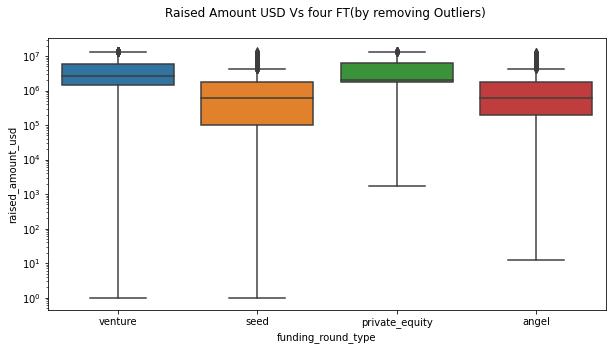

In [36]:
# box plot to check the outliers in funding types
plt.figure(figsize=(10,5))
plt.title("Raised Amount USD Vs four FT(by removing Outliers) \n", fontsize=12)
sns.boxplot(master_frame_4FT_Outliers.funding_round_type, master_frame_4FT_Outliers.raised_amount_usd)
plt.yscale('log')
plt.show()


#### Verifying individual distributions for four funding types by removing the outliers (re-verify)

In [37]:
# Creating individual df's for 4 funding types for finding out best representative amount among them
private_equity=master_frame[(master_frame['funding_round_type']=='private_equity')]
venture=master_frame[(master_frame['funding_round_type']=='venture')]
angel=master_frame[(master_frame['funding_round_type']=='angel')]
seed=master_frame[(master_frame['funding_round_type']=='seed')]

In [38]:
# calculating the outliers for private equity
p_Q1=private_equity['raised_amount_usd'].quantile(0.25)
p_Q3=private_equity['raised_amount_usd'].quantile(0.75)
p_IQR=(p_Q3)-(p_Q1)
print("IQR =", p_IQR)

p_Outliers_lower=(p_Q1)-1.5*(p_IQR)
p_Outliers_upper=(p_Q3)+1.5*(p_IQR)
print(p_Outliers_lower, p_Outliers_upper)

# removing outliers from private_equity, and assigning to df
private_equity_outlier=private_equity[(private_equity['raised_amount_usd']>(p_Outliers_lower)) & (private_equity['raised_amount_usd']<(p_Outliers_upper))]

IQR = 63000000.0
-92500000.0 159500000.0


Text(0.5, 1.0, ' Distribution of Raised Amount USD for Private Equity (by removing Outliers) \n')

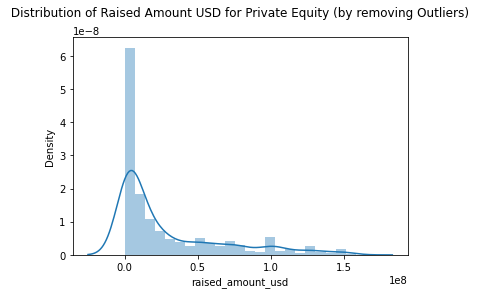

In [39]:
sns.distplot(private_equity_outlier.raised_amount_usd)
plt.show
plt.title(" Distribution of Raised Amount USD for Private Equity (by removing Outliers) \n", fontsize=12)

In [40]:
# calculating the outliers for venture
v_Q1=venture['raised_amount_usd'].quantile(0.25)
v_Q3=venture['raised_amount_usd'].quantile(0.75)
v_IQR=(v_Q3)-(v_Q1)
print("IQR =", v_IQR)

v_Outliers_lower=(v_Q1)-1.5*(v_IQR)
v_Outliers_upper=(v_Q3)+1.5*(v_IQR)
print(v_Outliers_lower, v_Outliers_upper)

# removing outliers from venture, and assigning to df
venture_outlier=venture[(venture['raised_amount_usd']>(v_Outliers_lower) ) & (venture['raised_amount_usd']<(v_Outliers_upper))]

IQR = 8950000.0
-11675000.0 24125000.0


Text(0.5, 1.0, ' Distribution of Raised Amount USD for Venture (by removing Outliers) \n')

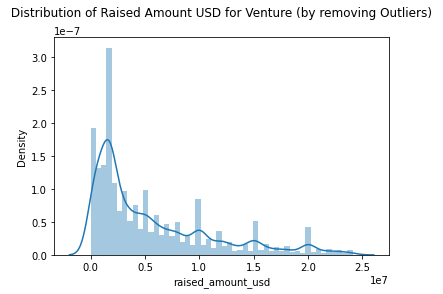

In [41]:
sns.distplot(venture_outlier.raised_amount_usd)
plt.show
plt.title(" Distribution of Raised Amount USD for Venture (by removing Outliers) \n", fontsize=12)

In [42]:
# calculating the outliers for angel
a_Q1=angel['raised_amount_usd'].quantile(0.25)
a_Q3=angel['raised_amount_usd'].quantile(0.75)
a_IQR=a_Q3-a_Q1
print("IQR =", a_IQR)

a_Outliers_lower=(a_Q1)-1.5*(a_IQR)
a_Outliers_upper=(a_Q3)+1.5*(a_IQR)
print(a_Outliers_lower, a_Outliers_upper)

# removing outliers from angel, and assigning to df
angel_outlier=angel[(angel['raised_amount_usd']>(a_Outliers_lower))  & (angel['raised_amount_usd']<(a_Outliers_upper))]


IQR = 1550000.0
-2125000.0 4075000.0


Text(0.5, 1.0, ' Distribution of Raised Amount USD for Angel (by removing Outliers) \n')

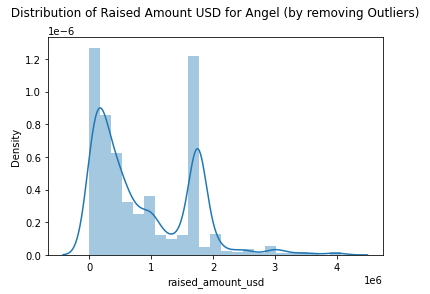

In [43]:
sns.distplot(angel_outlier.raised_amount_usd)
plt.show
plt.title(" Distribution of Raised Amount USD for Angel (by removing Outliers) \n", fontsize=12)

In [44]:
# calculating the outliers for seed
s_Q1=seed['raised_amount_usd'].quantile(0.25)
s_Q3=seed['raised_amount_usd'].quantile(0.75)
s_IQR=s_Q3-s_Q1
print("IQR =", s_IQR)

s_Outliers_lower=(s_Q1)-1.5*(s_IQR)
s_Outliers_upper=(s_Q3)+1.5*(s_IQR)
print(s_Outliers_lower, s_Outliers_upper)

# removing outliers from seed, and assigning to df
seed_outlier=seed[(seed['raised_amount_usd']>(s_Outliers_lower)) & (seed['raised_amount_usd']<(s_Outliers_upper))]

IQR = 1650000.0
-2375000.0 4225000.0


Text(0.5, 1.0, ' Distribution of Raised Amount USD for Seed (by removing Outliers) \n')

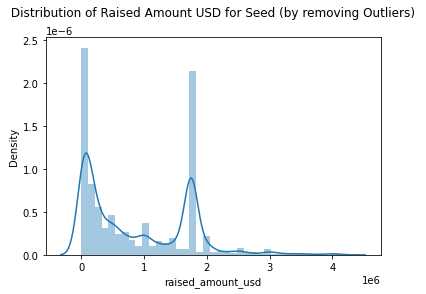

In [45]:
sns.distplot(seed_outlier.raised_amount_usd)
plt.show
plt.title(" Distribution of Raised Amount USD for Seed (by removing Outliers) \n", fontsize=12)

#### **Observations**: 
1. __"Median"__ is the most representative value of the investment amount, as mean is very much effected by outliers.
2. __"Venture funding type"__  is most suitable for Spark Funds, from the stats and box plot results.

# Checkpoints - Part 2

## Checkpoint 3: Country Analysis

In [46]:
# As per, Funding type analysis, "Venture funding type" is most suitable for Spark Funds
venture.head()

,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,state_code,region,city
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,16,Mumbai,Mumbai
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA,DE,DE - Other,Delaware City
3,"(the) one of them,inc.",venture,30-01-2014,3406878.0,apps|games|mobile,operating,NaN,NaN,NaN,NaN
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN,22,Beijing,Beijing
5,004 technologies,venture,24-07-2014,1750000.0,software,operating,USA,IL,"Springfield, Illinois",Champaign


In [47]:
venture.isnull().sum()

company_name             0
funding_round_type       0
funded_at                0
raised_amount_usd        0
category_list          707
status                   0
country_code          2267
state_code            3129
region                2891
city                  2891
dtype: int64

In [48]:
# removing the country code rows with null value, as we need the country names for analysis, nan values will not give results,so by dropping them
venture=venture[~venture.country_code.isnull()]

# As we are dealing with countries to invest Spark Funds, so we can remove 'state_code', 'region', 'city'. As this willn't effect the country and sector analysis
venture=venture.drop(['state_code', 'region', 'city'], axis=1)

print(venture.shape)
venture.head()

(49167, 7)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA
4,0-6.com,venture,19-03-2008,2000000.0,curated web,operating,CHN
5,004 technologies,venture,24-07-2014,1750000.0,software,operating,USA
8,ondine biomedical inc.,venture,21-12-2009,719491.0,biotechnology,operating,CAN


In [49]:
# verifying the missing values (column-wise) and displaying fraction of NaNs
round(100*(venture.isnull().sum()/len(venture.index)), 2)

company_name          0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd     0.00
category_list         0.88
status                0.00
country_code          0.00
dtype: float64

In [50]:
#Grouping the venture df with country code, to check the highest amount funding countries
group_by_country=pd.DataFrame(venture.groupby(['country_code'])['raised_amount_usd'].sum())
group_by_country=group_by_country.reset_index()
group_by_country

,country_code,raised_amount_usd
0,ARE,3.566175e+08
1,ARG,3.217888e+08
2,ARM,2.651750e+07
3,AUS,1.278995e+09
4,AUT,5.835471e+08
...,...,...
97,UKR,1.129246e+07
98,URY,1.983000e+07
99,USA,4.035821e+11
100,VNM,9.978051e+07


In [51]:
# Sorting the df
sorting_group_by_country=group_by_country.sort_values(by='raised_amount_usd', ascending=False)
sorting_group_by_country

,country_code,raised_amount_usd
99,USA,4.035821e+11
16,CHN,3.999602e+10
31,GBR,1.864209e+10
41,IND,1.433760e+10
13,CAN,8.975987e+09
...,...,...
84,SAU,5.000000e+05
17,CMR,3.595610e+05
36,GTM,3.000000e+05
78,PRI,2.500000e+05


In [52]:
# assigning the sorted grouped data to top9, to see the top 9 funding countries
top9=sorting_group_by_country[:9]
top9

,country_code,raised_amount_usd
99,USA,4.035821e+11
16,CHN,3.999602e+10
31,GBR,1.864209e+10
41,IND,1.433760e+10
13,CAN,8.975987e+09
30,FRA,6.881794e+09
44,ISR,6.692021e+09
23,DEU,6.439141e+09
47,JPN,3.317282e+09


verifying top9 data wrt below link with list of english speaking countries
https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

Table 3.1: __"Analysing the Top 3 English-Speaking Countries"__

**Observations**:
`top9` df provides the data to see the top nine coutries, which received the highest total funding.
1. Top English speaking country = USA
2. Second English speaking country = GBR
3. Third English speaking country = IND

## Checkpoint 4: Sector Analysis 1

In [53]:
# To proceed for sector analysis, assiging three most investment-friendly countries & the most suited funding type for Spark Funds in to new df
sector_analysis1=venture[venture['country_code'].isin(['USA', 'GBR', 'IND'])]
print(sector_analysis1.shape)
sector_analysis1.head()

(38901, 7)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA
5,004 technologies,venture,24-07-2014,1750000.0,software,operating,USA
10,h2o.ai,venture,09-11-2015,20000000.0,analytics,operating,USA
11,h2o.ai,venture,03-01-2013,1700000.0,analytics,operating,USA


In [54]:
sector_analysis1.isnull().sum()

company_name            0
funding_round_type      0
funded_at               0
raised_amount_usd       0
category_list         277
status                  0
country_code            0
dtype: int64

In [55]:
# removing missing value rows from category_list, without category, we cant analyse proper results
sector_analysis1=sector_analysis1[~sector_analysis1['category_list'].isnull()]

print(sector_analysis1.shape)
sector_analysis1.head()

(38624, 7)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA
5,004 technologies,venture,24-07-2014,1750000.0,software,operating,USA
10,h2o.ai,venture,09-11-2015,20000000.0,analytics,operating,USA
11,h2o.ai,venture,03-01-2013,1700000.0,analytics,operating,USA


As per the __"buisiness rule"__, Extracting the first string before vertical bar of each category from `category_list` column and assigning to `primary_sector`

In [56]:
sector_analysis1['primary_sector']=sector_analysis1['category_list'].apply(lambda x: str(x).split("|")[0])
print(sector_analysis1.shape)
sector_analysis1.head()

(38624, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,category_list,status,country_code,primary_sector
0,#fame,venture,05-01-2015,10000000.0,media,operating,IND,media
1,:qounter,venture,14-10-2014,1750000.0,application platforms|real time|social network...,operating,USA,application platforms
5,004 technologies,venture,24-07-2014,1750000.0,software,operating,USA,software
10,h2o.ai,venture,09-11-2015,20000000.0,analytics,operating,USA,analytics
11,h2o.ai,venture,03-01-2013,1700000.0,analytics,operating,USA,analytics


**Observation**: Extracted the `primary_sector` of each category from the `category_list` column

In [57]:
# removing redundant columns
sector_analysis1=sector_analysis1.drop(['category_list'], axis=1)
print(sector_analysis1.shape)
sector_analysis1.head()

(38624, 7)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector
0,#fame,venture,05-01-2015,10000000.0,operating,IND,media
1,:qounter,venture,14-10-2014,1750000.0,operating,USA,application platforms
5,004 technologies,venture,24-07-2014,1750000.0,operating,USA,software
10,h2o.ai,venture,09-11-2015,20000000.0,operating,USA,analytics
11,h2o.ai,venture,03-01-2013,1700000.0,operating,USA,analytics


In [58]:
mapping_file.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [59]:
mapping_file.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

**Observation**: `Category list` has one null value, so we can remove the null value row, as it has only blank column, which can also be removed, as it 'Blanks' are not part of our Eight main sectors

#### Cleaning mapping file

In [60]:
# Removing null value row from category list
mapping_file=mapping_file[~mapping_file.category_list.isnull()]

# removing redundant column, 'Blanks'
mapping_file=mapping_file.drop(['Blanks'], axis=1)

print(mapping_file.shape)
mapping_file.head()

(687, 9)


,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [61]:
# cleaning the 'category_list', as "Nanotechnology" is represented as "0notechnology"
mapping_file['category_list']=mapping_file['category_list'].apply(lambda x: str(x).replace("0", "na"))
print(mapping_file.shape)
mapping_file.head()

(687, 9)


,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


### Changing the mapping file, from wide format to long format

In [62]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_var = list(mapping_file.columns[1:])

# take the setdiff() to get the rest of the variables
id_var= list(np.setdiff1d(mapping_file.columns, value_var))

print(value_var, "\n")
print(id_var)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [63]:
# convert into long format
long_df = pd.melt(mapping_file, 
        id_vars = id_var, 
        value_vars = value_var)
long_df

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [64]:
# remove rows having value=0
long_df=long_df[long_df['value']==1]
long_df=long_df.drop('value', axis=1)
long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [65]:
# renaming the 'variable' column
long_df=long_df.rename(columns={'variable':'main_sector'})
long_df

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [66]:
long_df['category_list']=long_df['category_list'].str.lower()
long_df['main_sector']=long_df['main_sector'].str.lower()
long_df

,category_list,main_sector
7,adventure travel,automotive & sports
13,aerospace,automotive & sports
44,auto,automotive & sports
45,automated kiosk,automotive & sports
46,automotive,automotive & sports
...,...,...
5425,social recruiting,"social, finance, analytics, advertising"
5426,social television,"social, finance, analytics, advertising"
5427,social travel,"social, finance, analytics, advertising"
5438,stock exchanges,"social, finance, analytics, advertising"


**Observations**: Each primary sector mapped to one of the eight main sectors and assigned to "main_sector" df

In [67]:
#Merging the sector analysis1(funding & country analysis) with long_df(mapping;sectors)
sector_analysis2=pd.merge(sector_analysis1, long_df, how='left', left_on="primary_sector", right_on="category_list")
sector_analysis2

,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,category_list,main_sector
0,#fame,venture,05-01-2015,10000000.0,operating,IND,media,media,entertainment
1,:qounter,venture,14-10-2014,1750000.0,operating,USA,application platforms,application platforms,"news, search and messaging"
2,004 technologies,venture,24-07-2014,1750000.0,operating,USA,software,software,others
3,h2o.ai,venture,09-11-2015,20000000.0,operating,USA,analytics,analytics,"social, finance, analytics, advertising"
4,h2o.ai,venture,03-01-2013,1700000.0,operating,USA,analytics,analytics,"social, finance, analytics, advertising"
...,...,...,...,...,...,...,...,...,...
38619,zyomyx,venture,30-06-2013,12000000.0,operating,USA,biotechnology,biotechnology,cleantech / semiconductors
38620,zyomyx,venture,11-07-2013,14219999.0,operating,USA,biotechnology,biotechnology,cleantech / semiconductors
38621,zyomyx,venture,29-01-2010,555016.0,operating,USA,biotechnology,biotechnology,cleantech / semiconductors
38622,zyrra,venture,18-10-2012,140500.0,operating,USA,e-commerce,e-commerce,others


In [68]:
# removing redundant columns
sector_analysis2=sector_analysis2.drop(['category_list'], axis=1)
print(sector_analysis2.shape)
sector_analysis2.head()

(38624, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
0,#fame,venture,05-01-2015,10000000.0,operating,IND,media,entertainment
1,:qounter,venture,14-10-2014,1750000.0,operating,USA,application platforms,"news, search and messaging"
2,004 technologies,venture,24-07-2014,1750000.0,operating,USA,software,others
3,h2o.ai,venture,09-11-2015,20000000.0,operating,USA,analytics,"social, finance, analytics, advertising"
4,h2o.ai,venture,03-01-2013,1700000.0,operating,USA,analytics,"social, finance, analytics, advertising"


**Observations**: Merged dataframe with each `primary sector` mapped to its main sectors

## Checkpoint 5: Sector Analysis 2

In [69]:
#Creating the df with most heavily invested main sectors in each of the three countries and investments range of 5-15 M USD
df=sector_analysis2[(sector_analysis2['raised_amount_usd']>=5000000) & (sector_analysis2['raised_amount_usd']<=15000000)]
df

,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
0,#fame,venture,05-01-2015,10000000.0,operating,IND,media,entertainment
5,h2o.ai,venture,19-07-2014,8900000.0,operating,USA,analytics,"social, finance, analytics, advertising"
6,1 mainstream,venture,17-03-2015,5000000.0,acquired,USA,apps,"news, search and messaging"
20,128 technology,venture,16-12-2014,11999347.0,operating,USA,service providers,others
23,1366 technologies,venture,15-10-2013,15000000.0,operating,USA,manufacturing,manufacturing
...,...,...,...,...,...,...,...,...
38615,zynga,venture,12-02-2008,5026000.0,ipo,USA,facebook applications,"social, finance, analytics, advertising"
38617,zynstra,venture,09-07-2014,8400000.0,operating,GBR,software,others
38619,zyomyx,venture,30-06-2013,12000000.0,operating,USA,biotechnology,cleantech / semiconductors
38620,zyomyx,venture,11-07-2013,14219999.0,operating,USA,biotechnology,cleantech / semiconductors


In [70]:
#sorting the sector_analysis_2 with raised_amount_usd in descending order     /organization/-fame
sector_analysis2_sort=df.sort_values(by='raised_amount_usd', ascending=False)
print(sector_analysis2_sort.shape)
sector_analysis2_sort.head()

(12184, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
19534,lumexis,venture,30-11-2009,15000000.0,operating,USA,in-flight entertainment,entertainment
25320,personal capital,venture,26-08-2011,15000000.0,operating,USA,finance,"social, finance, analytics, advertising"
7700,code green networks,venture,10-01-2006,15000000.0,acquired,USA,enterprise software,others
2287,aoptix technologies,venture,30-05-2007,15000000.0,operating,USA,biometrics,cleantech / semiconductors
25130,peg bandwidth,venture,22-03-2010,15000000.0,operating,USA,mobile,"news, search and messaging"


## Sector-wise Investment Analysis

#### Creating three separate data frames D1, D2 and D3 for each of the three countries('USA', 'GBR', 'IND') containing the observations of funding type FT falling within the 5-15 million USD range.

#### Creating D1 dataframe, with country code USA

In [71]:
D1=sector_analysis2_sort[sector_analysis2_sort['country_code'].isin(['USA'])]
print(D1.shape)
D1.head()

(11287, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
19534,lumexis,venture,30-11-2009,15000000.0,operating,USA,in-flight entertainment,entertainment
25320,personal capital,venture,26-08-2011,15000000.0,operating,USA,finance,"social, finance, analytics, advertising"
7700,code green networks,venture,10-01-2006,15000000.0,acquired,USA,enterprise software,others
2287,aoptix technologies,venture,30-05-2007,15000000.0,operating,USA,biometrics,cleantech / semiconductors
25130,peg bandwidth,venture,22-03-2010,15000000.0,operating,USA,mobile,"news, search and messaging"


In [72]:
# Total number of Investments (count) in USA
print("Total no of unique investments in each main sector\n",D1['main_sector'].value_counts())

# Total amount of investment (USD)in each main sector in descending order
print("\n\nTotal amount of investment (USD)in each main sector in descending order:")
D1_amount=D1.groupby(['main_sector'])['raised_amount_usd'].sum()
D1_amount.sort_values(ascending=False)


Total no of unique investments in each main sector
 others                                     2758
social, finance, analytics, advertising    2590
cleantech / semiconductors                 2192
news, search and messaging                 1465
health                                      854
manufacturing                               739
entertainment                               531
automotive & sports                         157
Name: main_sector, dtype: int64


Total amount of investment (USD)in each main sector in descending order:


main_sector
others                                     2.463670e+10
social, finance, analytics, advertising    2.283077e+10
cleantech / semiconductors                 2.012233e+10
news, search and messaging                 1.298891e+10
health                                     7.744830e+09
manufacturing                              6.700079e+09
entertainment                              4.602750e+09
automotive & sports                        1.374304e+09
Name: raised_amount_usd, dtype: float64

In [73]:
#grouping the main sectors and company name with raised_amount_usd, assigning to new df
D1_company_count=pd.DataFrame((D1.groupby(['main_sector','company_name'])["raised_amount_usd"].sum()))
D1_company_count=D1_company_count.reset_index()

#To get the company wise highest Investment in Top sector countwise("Others") 
D1_company_count_Others = D1_company_count[D1_company_count.main_sector=="Others"]
D1_company_count_Others = D1_company_count_Others.sort_values("raised_amount_usd",ascending=False)
D1_company_count_Others.head()

,main_sector,company_name,raised_amount_usd


Table 5.1 : __"Sector-wise Investment Analysis for D1(USA)"__

In [74]:
# Total no of unique investments(count) in each main sector
print("1. Total number of Investments (count) = ",(D1['primary_sector'].count()))
#Total amount of investment for all sectors
print("2. Total amount of investment (USD) = ", D1['raised_amount_usd'].sum())
# Top sector, based on count of investments, which has more investments from 8 main sectors
print("3. Top Sector name (no. of investment-wise) = ", D1['main_sector'].value_counts()[:1])
# second best sector, based on count of investments, which has more investments from 8 main sectors
print("4. Second Sector name (no. of investment-wise) =", D1['main_sector'].value_counts()[1:2])
# Third best sector, based on count of investments, which has more investments from 8 main sectors
print("5. Third Sector name (no. of investment-wise) = ", D1['main_sector'].value_counts()[2:3])
print("6. Number of investments in top sector (point 3) =", D1['main_sector'].value_counts()[0])
print("7. Number of investments in second sector (point 4) = ",D1['main_sector'].value_counts()[1])
print("8. Number of investments in third sector (point 5) = ", D1['main_sector'].value_counts()[2])
print("9. For point 3 (top sector count-wise), which company received the highest investment? ", D1_company_count_Others['company_name'][:1])
print("10. For point 4 (second best sector count-wise), which company received the highest investment? ",D1_company_count_Others['company_name'][1:2])

1. Total number of Investments (count) =  11287
2. Total amount of investment (USD) =  101010153708.0
3. Top Sector name (no. of investment-wise) =  others    2758
Name: main_sector, dtype: int64
4. Second Sector name (no. of investment-wise) = social, finance, analytics, advertising    2590
Name: main_sector, dtype: int64
5. Third Sector name (no. of investment-wise) =  cleantech / semiconductors    2192
Name: main_sector, dtype: int64
6. Number of investments in top sector (point 3) = 2758
7. Number of investments in second sector (point 4) =  2590
8. Number of investments in third sector (point 5) =  2192
9. For point 3 (top sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)
10. For point 4 (second best sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)


#### Creating D2 dataframe, with country code GBR

In [75]:
D2=sector_analysis2_sort[sector_analysis2_sort['country_code'].isin(['GBR'])]
print(D2.shape)
D2.head()

(582, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
34608,tribold,venture,22-03-2007,15000000.0,acquired,GBR,software,others
23154,notonthehighstreet,venture,21-05-2012,15000000.0,operating,GBR,e-commerce,others
23989,opengamma,venture,08-08-2012,15000000.0,operating,GBR,financial services,"social, finance, analytics, advertising"
30490,similarweb,venture,25-11-2014,15000000.0,operating,GBR,advertising,"social, finance, analytics, advertising"
30476,silverrail technologies,venture,21-03-2012,15000000.0,operating,GBR,technology,others


In [76]:
# Total number of Investments (count) in GBR
print("Total no of unique investments in each main sector\n",D2['main_sector'].value_counts())

# Total amount of investment (USD)in each main sector in descending order
print("\n\nTotal amount of investment (USD)in each main sector in descending order:")
D2_amount=D2.groupby(['main_sector'])['raised_amount_usd'].sum()
D2_amount.sort_values(ascending=False)

Total no of unique investments in each main sector
 others                                     140
social, finance, analytics, advertising    128
cleantech / semiconductors                 116
news, search and messaging                  66
entertainment                               53
manufacturing                               40
health                                      23
automotive & sports                         16
Name: main_sector, dtype: int64


Total amount of investment (USD)in each main sector in descending order:


main_sector
others                                     1.215442e+09
social, finance, analytics, advertising    1.054628e+09
cleantech / semiconductors                 1.048294e+09
news, search and messaging                 5.585007e+08
entertainment                              4.635147e+08
manufacturing                              3.433243e+08
health                                     2.025375e+08
automotive & sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [77]:
#grouping the main sectors and company name with raised_amount_usd, assigning to new df
D2_company_count=pd.DataFrame((D2.groupby(['main_sector','company_name'])["raised_amount_usd"].sum()))
D2_company_count = D2_company_count.reset_index()

#To get the company wise highest Investment in Top sector countwise("Others") 
D2_company_count_Others = D2_company_count[D2_company_count.main_sector=="Others"]
D2_company_count_Others = D2_company_count_Others.sort_values("raised_amount_usd",ascending=False)
D2_company_count_Others

,main_sector,company_name,raised_amount_usd


Table 5.1 : __"Sector-wise Investment Analysis for D2(GBR)"__

In [78]:
# Total no of unique investments(count) in each main sector
print("1. Total number of Investments (count) = ",(D2['main_sector'].count()))
#Total amount of investment for all sectors
print("2. Total amount of investment (USD) = ", D2['raised_amount_usd'].sum())
# Top sector, based on count of investments, which has more investments from 8 main sectors
print("3. Top Sector name (no. of investment-wise) = ", D2['main_sector'].value_counts()[:1])
# second best sector, based on count of investments, which has more investments from 8 main sectors
print("4. Second Sector name (no. of investment-wise) =", D2['main_sector'].value_counts()[1:2])
# Third best sector, based on count of investments, which has more investments from 8 main sectors
print("5. Third Sector name (no. of investment-wise) = ", D2['main_sector'].value_counts()[2:3])
print("6. Number of investments in top sector (point 3) =", D2['main_sector'].value_counts()[0])
print("7. Number of investments in second sector (point 4) = ",D2['main_sector'].value_counts()[1])
print("8. Number of investments in third sector (point 5) = ", D2['main_sector'].value_counts()[2])
print("9. For point 3 (top sector count-wise), which company received the highest investment? ", D2_company_count_Others['company_name'][:1])
print("10. For point 4 (second best sector count-wise), which company received the highest investment? ",D2_company_count_Others['company_name'][1:2])

1. Total number of Investments (count) =  582
2. Total amount of investment (USD) =  5053293406.0
3. Top Sector name (no. of investment-wise) =  others    140
Name: main_sector, dtype: int64
4. Second Sector name (no. of investment-wise) = social, finance, analytics, advertising    128
Name: main_sector, dtype: int64
5. Third Sector name (no. of investment-wise) =  cleantech / semiconductors    116
Name: main_sector, dtype: int64
6. Number of investments in top sector (point 3) = 140
7. Number of investments in second sector (point 4) =  128
8. Number of investments in third sector (point 5) =  116
9. For point 3 (top sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)
10. For point 4 (second best sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)


#### Creating D3 dataframe, with country code IND

In [79]:
D3=sector_analysis2_sort[sector_analysis2_sort['country_code'].isin(['IND'])]
print(D3.shape)
D3.head()

(315, 8)


,company_name,funding_round_type,funded_at,raised_amount_usd,status,country_code,primary_sector,main_sector
25215,pepperfry.com,venture,27-05-2014,15000000.0,operating,IND,e-commerce,others
2360,apnapaisa,venture,01-12-2007,15000000.0,operating,IND,credit,"social, finance, analytics, advertising"
7934,commonfloor,venture,08-01-2015,15000000.0,operating,IND,real estate,others
7235,classteacher learning systems,venture,27-06-2011,15000000.0,operating,IND,edtech,others
34503,travelguru,venture,29-11-2006,15000000.0,acquired,IND,career planning,"social, finance, analytics, advertising"


In [80]:
# Total number of Investments (count) in IND
print("Total no of unique investments in each main sector\n",D3['main_sector'].value_counts())

# Total amount of investment (USD)in each main sector in descending order
print("\n\nTotal amount of investment (USD)in each main sector in descending order:")
D3_amount=D3.groupby(['main_sector'])['raised_amount_usd'].sum()
D3_amount=D3_amount.sort_values(ascending=False)
D3_amount


Total no of unique investments in each main sector
 others                                     103
social, finance, analytics, advertising     59
news, search and messaging                  49
entertainment                               32
manufacturing                               21
cleantech / semiconductors                  20
health                                      18
automotive & sports                         13
Name: main_sector, dtype: int64


Total amount of investment (USD)in each main sector in descending order:


main_sector
others                                     940289507.0
social, finance, analytics, advertising    535549550.0
news, search and messaging                 408834545.0
entertainment                              272080000.0
manufacturing                              200900000.0
cleantech / semiconductors                 165380000.0
health                                     160740000.0
automotive & sports                        136900000.0
Name: raised_amount_usd, dtype: float64

In [81]:
#grouping the main sectors and company name with raised_amount_usd, assigning to new df
D3_company_count=pd.DataFrame((D3.groupby(['main_sector','company_name'])["raised_amount_usd"].sum()))
D3_company_count=D3_company_count.reset_index()

#To get the company wise highest Investment in Top sector countwise("Others")
D3_company_count_Others = D3_company_count[D3_company_count.main_sector=="Others"]
D3_company_count_Others = D3_company_count_Others.sort_values("raised_amount_usd",ascending=False)
D3_company_count_Others

,main_sector,company_name,raised_amount_usd


Table 5.1 : __"Sector-wise Investment Analysis for D3(IND)"__

In [82]:
# Total no of unique investments(count) in each main sector
print("1. Total number of Investments (count) = ",len(D3['primary_sector'].unique()))
#Total amount of investment for all sectors
print("2. Total amount of investment (USD) = ", D3['raised_amount_usd'].sum())
# Top sector, based on count of investments, which has more investments from 8 main sectors
print("3. Top Sector name (no. of investment-wise) = ", D3['main_sector'].value_counts()[:1])
# second best sector, based on count of investments, which has more investments from 8 main sectors
print("4. Second Sector name (no. of investment-wise) =", D3['main_sector'].value_counts()[1:2])
# Third best sector, based on count of investments, which has more investments from 8 main sectors
print("5. Third Sector name (no. of investment-wise) = ", D3['main_sector'].value_counts()[2:3])
print("6. Number of investments in top sector (point 3) =", D3['main_sector'].value_counts()[0])
print("7. Number of investments in second sector (point 4) = ",D3['main_sector'].value_counts()[1])
print("8. Number of investments in third sector (point 5) = ", D3['main_sector'].value_counts()[2])
print("9. For point 3 (top sector count-wise), which company received the highest investment? ", D3_company_count_Others['company_name'][:1])
print("10. For point 4 (second best sector count-wise), which company received the highest investment? ",D3_company_count_Others['company_name'][1:2])

1. Total number of Investments (count) =  86
2. Total amount of investment (USD) =  2820673602.0
3. Top Sector name (no. of investment-wise) =  others    103
Name: main_sector, dtype: int64
4. Second Sector name (no. of investment-wise) = social, finance, analytics, advertising    59
Name: main_sector, dtype: int64
5. Third Sector name (no. of investment-wise) =  news, search and messaging    49
Name: main_sector, dtype: int64
6. Number of investments in top sector (point 3) = 103
7. Number of investments in second sector (point 4) =  59
8. Number of investments in third sector (point 5) =  49
9. For point 3 (top sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)
10. For point 4 (second best sector count-wise), which company received the highest investment?  Series([], Name: company_name, dtype: object)


In [83]:
#grouping the main sectors and company name with raised_amount_usd, assigning to new df
sector_analysis2_sort_count=pd.DataFrame((sector_analysis2_sort.groupby(['main_sector','country_code'])["raised_amount_usd"].sum()))
sector_analysis2_sort_count = sector_analysis2_sort_count.reset_index()

#To get the company wise highest Investment in Top sector countwise("Others") 
D2_company_count_Others = D2_company_count[D2_company_count.main_sector=="Others"]
D2_company_count_Others = D2_company_count_Others.sort_values("raised_amount_usd",ascending=False)
D2_company_count_Others

,main_sector,company_name,raised_amount_usd


## Checkpoint 6: Plots

***1. A plot showing the representative amount of investment in each funding type.***

<function matplotlib.pyplot.show(close=None, block=None)>

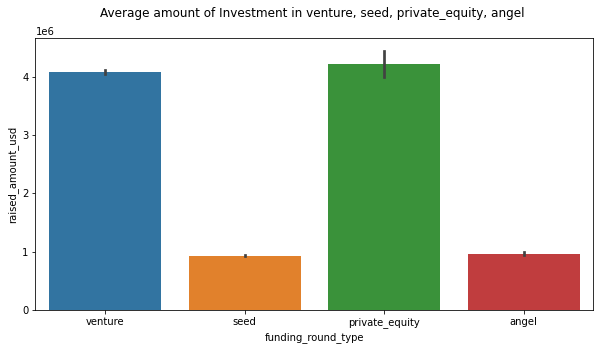

In [84]:
plt.figure(figsize=(10, 5))
plt.title("Average amount of Investment in venture, seed, private_equity, angel \n", fontsize=12)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_4FT_Outliers)
plt.show

***2. A plot showing the top 9 countries against the total amount of investments of funding type FT.***

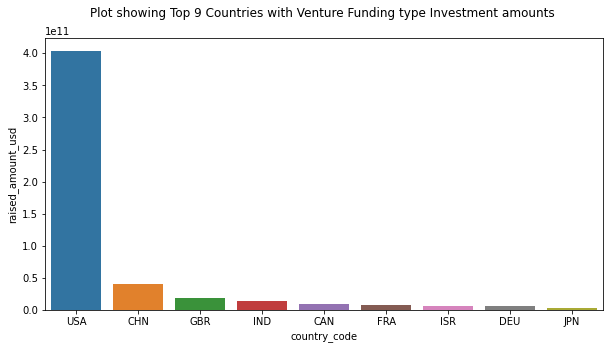

In [85]:
plt.figure(figsize=(10, 5))
plt.title("Plot showing Top 9 Countries with Venture Funding type Investment amounts \n", fontsize=12)
sns.barplot(data=top9, x='country_code', y='raised_amount_usd')
plt.show()

***3. A plot showing the number of investments in the top 3 sectors of the top 3 countries (for Venture investment type)***

<function matplotlib.pyplot.show(close=None, block=None)>

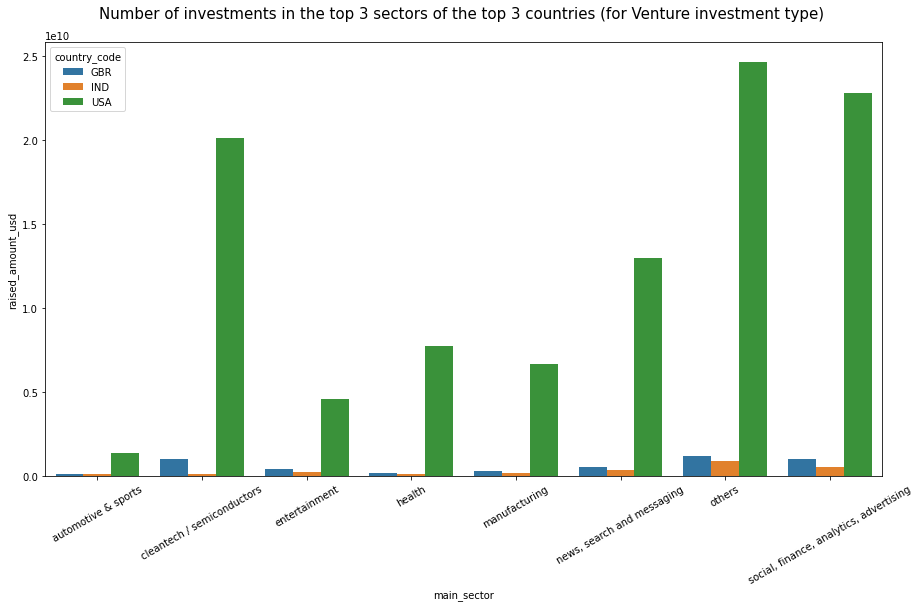

In [86]:
plt.figure(figsize=(15,8))
plt.title("Number of investments in the top 3 sectors of the top 3 countries (for Venture investment type) \n", fontsize=15)
a=sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=sector_analysis2_sort_count, estimator=np.sum)
a.set_xticklabels(a.get_xticklabels(), rotation=30)
plt.show